# Racetrack Problem

#### Problem Description

Consider driving a race car around a turn like those shown in Figure 5.5. You want to go as fast as possible, but not so fast as to run off the track. In our simplified racetrack, the car is at one of a discrete set of grid positions, the cells in the diagram. The velocity is also discrete, a number of grid cells moved horizontally and vertically per time step. The actions are increments to the velocity components. 

Each may be changed by +1, 1, or 0 in each step, for a total of nine (3 x 3) actions. Both velocity components are restricted to be nonnegative and less than 5, and they cannot both be zero except at the starting line. Each episode begins in one of the randomly selected start states with both velocity components zero and ends when the car crosses the finish line. 

The rewards are -1 for each step until the car crosses the finish line. If the car hits the track boundary, it is moved back to a random position on the starting line, both velocity components are reduced to zero, and the episode continues. Before updating the car’s location at each time step, check to see if the projected path of the car intersects the track boundary. If it intersects the finish line, the episode ends; if it intersects anywhere else, the car is considered to have hit the track boundary and is sent back to the starting line. 

To make the task more challenging, with probability 0.1 at each time step the velocity increments are both zero, independently of the intended increments. Apply a Monte Carlo control method to this task to compute the optimal policy from each starting state. Exhibit several trajectories following the optimal policy (but turn the noise off for these trajectories).

#### Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import gymnasium as gym
import pygame
from environment import RaceTrackEnv
from agent import OnPolicyMonteCarloAgent, OffPolicyMonteCarloAgent

### Plotting tracks

In [ ]:
# Plot both track a and track b
with open('./track_a.npy', 'rb') as f:
    track = np.load(f)
    plt.subplot(1, 2, 1)
    plt.imshow(track)
    sns.heatmap(track, linewidths=1, cbar=False, cmap='binary')


with open('./track_b.npy', 'rb') as f:
    track = np.load(f)
    plt.subplot(1, 2, 2)
    plt.imshow(track)
    sns.heatmap(track, linewidths=1, cbar=False, cmap='binary')

## Racetrack Environment

In [ ]:
# render_mode = 'human'
# env = RaceTrackEnv('b', render_mode=render_mode, size=20)
# env.reset()
# total_reward = 0
# total_reset = 0
# terminated = False

# for _ in range(20):
#     action = np.random.choice(env.nA)

#     observation, reward, terminated, reset = env.step(action)

#     total_reward += reward
#     total_reset += 1 if reset else 0

#     if terminated:
#         print(observation, total_reward, total_reset)
#         break

## Off-Policy Monte Carlo Training

#### Plotting Trajectory Code

In [ ]:
def plot_multiple_trajectories(agent, num_trajectories=4):
    """Simulates multiple best trajectories from different random starting positions and plots them in a 4x4 grid."""

    # Set up the figure with a 2x2 grid of subplots
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))

    # Flatten axes for easier indexing
    axes = axes.flatten()

    for idx in range(num_trajectories):
        # Get a random start state (row, col) and set initial speed to (0, 0)
        # Get initial state (row, col, y_speed, x_speed)
        state = agent.env.reset()[0]
        state = (state[0], state[1], 0, 0)  # Set speed to (0, 0)

        trajectory = [state]  # Store the sequence of states visited

        done = False
        while not done:
            # Choose the best action (greedy policy)
            # Use greedy policy to select the best action
            action = np.argmax(agent.Q[state])
            next_state, reward, done, reset = agent.env.step(
                action)  # Take action
            if reset:
                print("Reset")
                trajectory = [next_state]
            else:
                trajectory.append(next_state)  # Store next state
            state = next_state  # Move to next state

        # Extract row and column positions for plotting
        rows = [s[0] for s in trajectory]
        cols = [s[1] for s in trajectory]

        # Plot the racetrack with trajectory overlay for each subplot
        ax = axes[idx]  # Get the current subplot axis

        # Background racetrack: Use the track layout (1 for obstacles, 0 for free space)
        # 1 = obstacle, 0 = free space
        ax.imshow(agent.env.track, cmap="gray", alpha=0.3)

        # Plot trajectory
        ax.plot(cols, rows, marker='o', color='red', markersize=5,
                linestyle='-', linewidth=2, label="Best Trajectory")

        # Mark start and end points
        ax.scatter(cols[0], rows[0], color="green",
                   s=100, label="Start")  # Green: Start
        ax.scatter(cols[-1], rows[-1], color="blue",
                   s=100, label="Finish")  # Blue: Finish

        # Set plot aesthetics
        ax.set_xticks(range(agent.env.nS[1]))
        ax.set_yticks(range(agent.env.nS[0]))
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_title(f"Best Trajectory {idx+1}")
        ax.legend()

    # Display the plots
    plt.tight_layout()
    plt.show()

## Plots

In [4]:
env_a = RaceTrackEnv('a', render_mode=None, size=20)
agent_a = OnPolicyMonteCarloAgent(env_a)
episode_lengths = agent_a.train(10)

Episode 0 completed, length: 12495, epsilon: 0.0999
Training completed


In [17]:
num_agents = 10
num_episodes = 100

episode_lengths = np.zeros((num_agents, num_episodes))
for i in range(num_agents):
    env_a = RaceTrackEnv('a', render_mode=None, size=20)
    agent_a = OnPolicyMonteCarloAgent(env_a)
    episode_lengths[i] = agent_a.train(num_episodes)

# Average episode lengths over all agents
avg_episode_lengths = np.mean(episode_lengths, axis=0)

Episode 0 completed, length: 2141, epsilon: 0.0999
Training completed
Episode 0 completed, length: 22099, epsilon: 0.0999
Training completed
Episode 0 completed, length: 14558, epsilon: 0.0999
Training completed
Episode 0 completed, length: 7198, epsilon: 0.0999
Training completed
Episode 0 completed, length: 693, epsilon: 0.0999
Training completed
Episode 0 completed, length: 20518, epsilon: 0.0999
Training completed
Episode 0 completed, length: 6932, epsilon: 0.0999
Training completed
Episode 0 completed, length: 4459, epsilon: 0.0999
Training completed
Episode 0 completed, length: 2947, epsilon: 0.0999
Training completed
Episode 0 completed, length: 29442, epsilon: 0.0999
Training completed


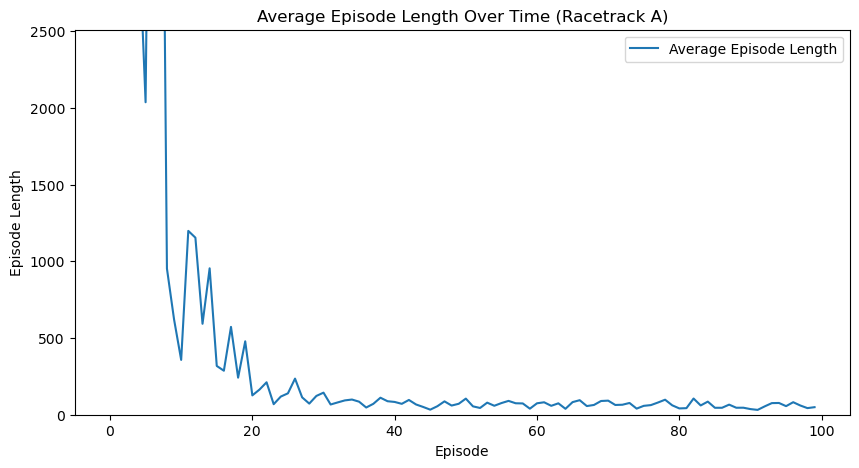

In [19]:
# Plot the average episode lengths
plt.figure(figsize=(10, 5))
ax = plt.gca()
ax.set_ylim([0, 2510])
plt.plot(avg_episode_lengths, label="Average Episode Length")
plt.xlabel("Episode")
plt.ylabel("Episode Length")
plt.title("Average Episode Length Over Time (Racetrack A)")
plt.legend()
plt.show()

In [15]:
num_agents = 10
num_episodes = 100

episode_lengths = np.zeros((num_agents, num_episodes))
for i in range(num_agents):
    env_b = RaceTrackEnv('b', render_mode=None, size=20)
    agent_b = OnPolicyMonteCarloAgent(env_b)
    episode_lengths[i] = agent_b.train(num_episodes)

# Average episode lengths over all agents
avg_episode_lengths = np.mean(episode_lengths, axis=0)

Episode 0 completed, length: 1114, epsilon: 0.0999
Training completed
Episode 0 completed, length: 642, epsilon: 0.0999
Training completed
Episode 0 completed, length: 1914, epsilon: 0.0999
Training completed
Episode 0 completed, length: 504, epsilon: 0.0999
Training completed
Episode 0 completed, length: 1168, epsilon: 0.0999
Training completed
Episode 0 completed, length: 1400, epsilon: 0.0999
Training completed
Episode 0 completed, length: 4548, epsilon: 0.0999
Training completed
Episode 0 completed, length: 1043, epsilon: 0.0999
Training completed
Episode 0 completed, length: 826, epsilon: 0.0999
Training completed
Episode 0 completed, length: 1550, epsilon: 0.0999
Training completed


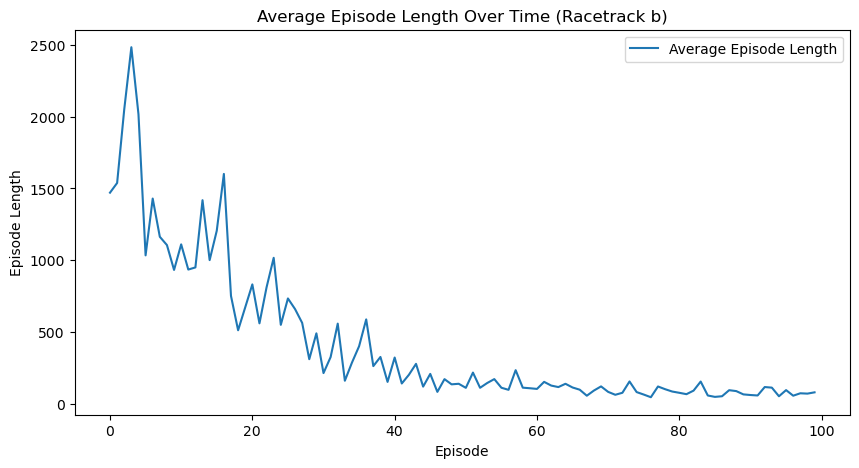

In [16]:
# Plot the average episode lengths
plt.figure(figsize=(10, 5))
plt.plot(avg_episode_lengths, label="Average Episode Length")
plt.xlabel("Episode")
plt.ylabel("Episode Length")
plt.title("Average Episode Length Over Time (Racetrack b)")
plt.legend()
plt.show()

Reset
Reset
Reset
Reset
Reset
Reset
Reset
Reset
Reset
Reset


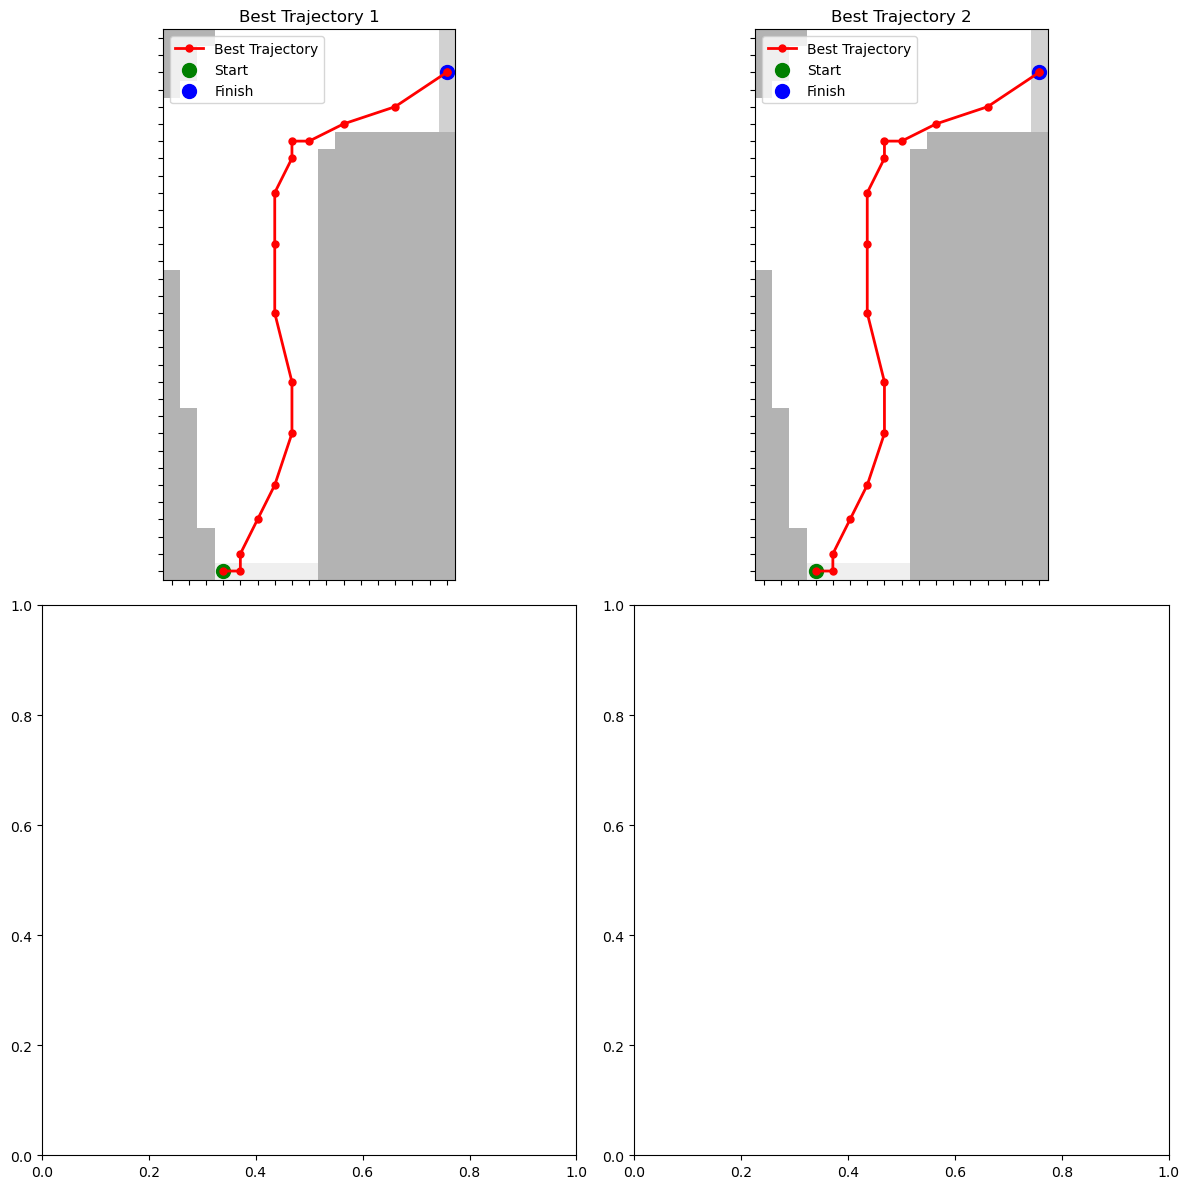

In [ ]:
plot_multiple_trajectories(agent_b, num_trajectories=2)

In [14]:
# Run the agent and plot the number of resets
env_b = RaceTrackEnv('b', render_mode=None, size=20)
agent_b = OnPolicyMonteCarloAgent(env_b)
agent_b.train(100)

Episode 0 completed, length: 2406, epsilon: 0.0999
Training completed


[2406,
 1985,
 3411,
 108,
 1314,
 168,
 3055,
 4221,
 957,
 943,
 1513,
 2866,
 650,
 55,
 660,
 1121,
 920,
 585,
 859,
 3137,
 113,
 821,
 2277,
 148,
 240,
 311,
 1149,
 384,
 143,
 286,
 363,
 637,
 248,
 68,
 839,
 348,
 643,
 730,
 12,
 89,
 340,
 234,
 447,
 214,
 292,
 188,
 92,
 12,
 73,
 44,
 165,
 201,
 572,
 148,
 329,
 236,
 41,
 53,
 75,
 18,
 77,
 76,
 78,
 140,
 89,
 435,
 146,
 69,
 211,
 21,
 12,
 31,
 117,
 306,
 199,
 51,
 93,
 62,
 118,
 35,
 44,
 26,
 90,
 48,
 71,
 60,
 47,
 242,
 130,
 176,
 61,
 15,
 66,
 33,
 299,
 71,
 16,
 30,
 12,
 39]

Reset
Reset
Reset
Reset
Reset
Reset
Reset
Reset
Reset
Reset
Reset
Reset
Reset
Reset
Reset
Reset
Reset
Reset
Reset
Reset
Reset
Reset
Reset
Reset


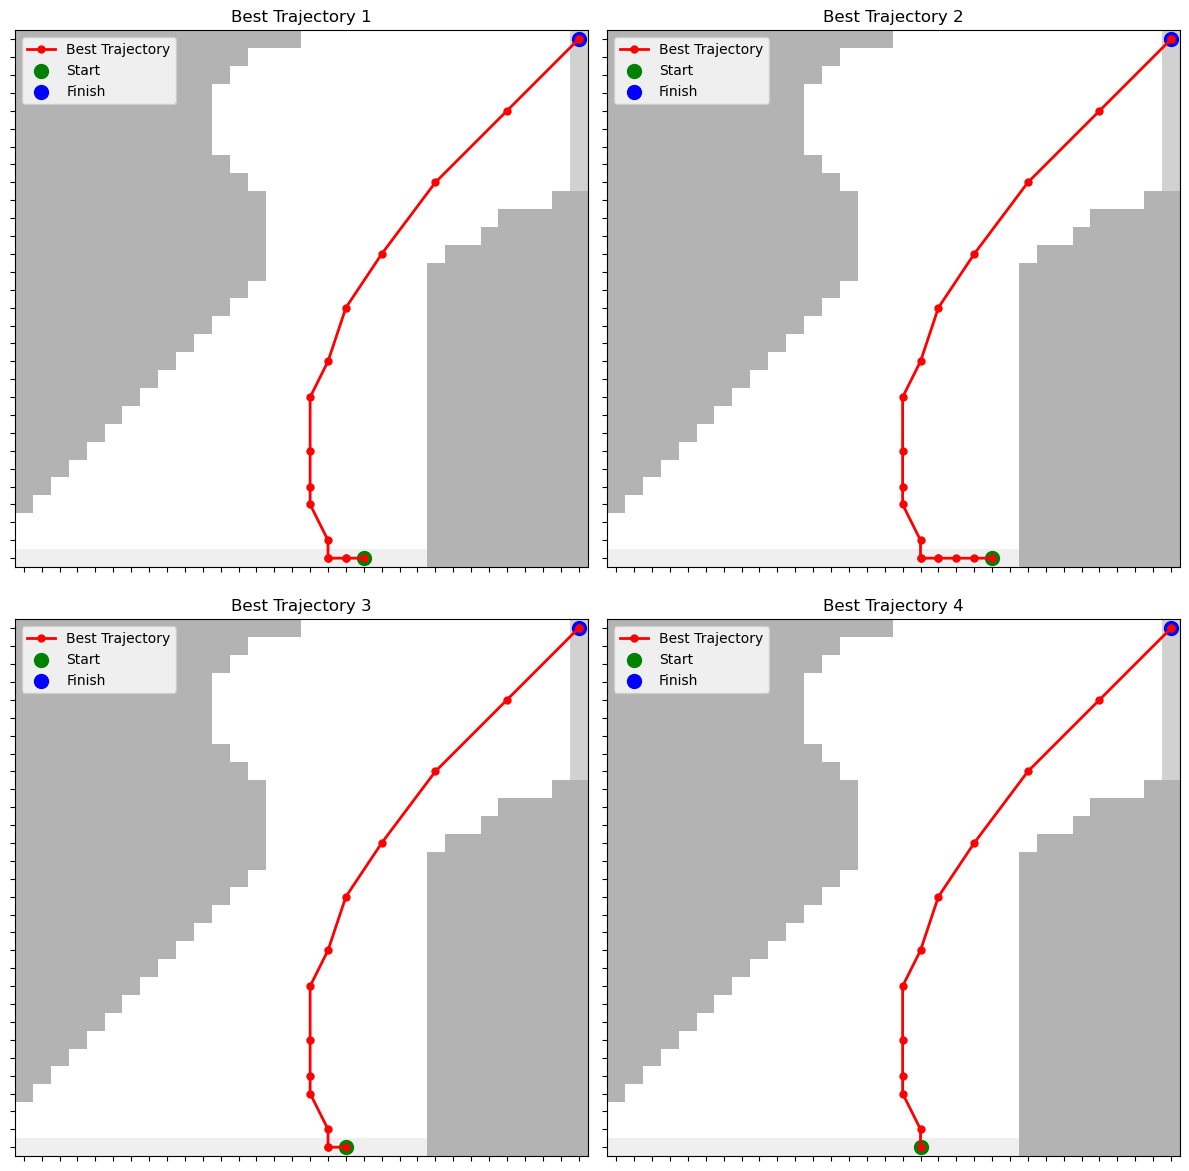

In [15]:
plot_multiple_trajectories(agent_b, num_trajectories=4)

## On-Policy Monte Carlo Training

In [ ]:
from agent import OnPolicyMonteCarloAgent
# Train 10 agents for each epsilon value
# Plot their average episode lengths
epsilons = [0.1, 0.2, 0.3, 0.4, 0.5]
num_agents = 10
num_episodes = 50

# Store the average episode lengths for each epsilon value
avg_episode_lengths = []

for epsilon in epsilons:
    episode_lengths = []

    for _ in range(num_agents):
        env = RaceTrackEnv('b', render_mode=None, size=20)
        agent = OnPolicyMonteCarloAgent(env, epsilon=epsilon)
        episode_lengths.append(agent.train(num_episodes))

    avg_episode_lengths.append(np.mean(episode_lengths))

In [ ]:
# Plot the average episode lengths for each epsilon value
plt.figure(figsize=(10, 6))
plt.plot(epsilons, avg_episode_lengths, marker='o')
plt.title("Average Episode Length vs. Epsilon")
plt.xlabel("Epsilon")
plt.ylabel("Average Episode Length")
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from agent import OnPolicyMonteCarloAgent, OffPolicyMonteCarloAgent

# Assume you have trained both agents and collected their episode lengths
env1 = RaceTrackEnv('a', render_mode=None, size=20)
env2 = RaceTrackEnv('a', render_mode=None, size=20)
on_policy_episode_lengths = OnPolicyMonteCarloAgent(env1).train(episodes=1000)
off_policy_episode_lengths = OffPolicyMonteCarloAgent(env2).train(episodes=1000)

# Plot episode lengths to compare convergence rates
plt.plot(on_policy_episode_lengths, label="On-Policy")
plt.plot(off_policy_episode_lengths, label="Off-Policy")
plt.xlabel("Episodes")
plt.ylabel("Episode Length")
plt.legend()
plt.title("Learning Curves of On-Policy vs Off-Policy Monte Carlo")
plt.show()